In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale , StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [4]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [8]:
df=pd.read_csv(r"C:\Users\Onur\Desktop\Turkcell_MachineLearning\diabetes.csv")

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
#MODEL TAHMİN

In [14]:
df["Outcome"].value_counts() #hangi sınıftan kaç tane olduğunu görürüz

0    500
1    268
Name: Outcome, dtype: int64

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [22]:
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)

In [25]:
log_model=LogisticRegression(solver="liblinear").fit(X,y)

In [26]:
log_model.intercept_

array([-5.89159518])

In [27]:
log_model.coef_

array([[ 1.17052230e-01,  2.83873955e-02, -1.68897224e-02,
         7.55274087e-04, -6.42755924e-04,  5.97603789e-02,
         6.77671880e-01,  7.23947807e-03]])

In [28]:
log_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [29]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [30]:
y_pred=log_model.predict(X)

In [31]:
#karmaşıklık matrixini kullanarak hatalarımızı değerlendireceğiz

In [33]:
confusion_matrix(y,y_pred) #bunun üzerinden yorum yapmak zor olabilir

array([[448,  52],
       [121, 147]], dtype=int64)

In [34]:
accuracy_score(y,y_pred)  #doğruluk başarılık oranını vericek

0.7747395833333334

In [36]:
print(classification_report(y,y_pred)) #sınıflandırma raporu veriyor

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [37]:
#yukarıda tahmin değerlerini 1 ve 0 oluştu. eğer bazı durumlarda bunu olasılık değerlerinin kendisinden almak istersek
#(logistic regresyon bize 1 değerinin olma değerini veriyordu)
#aşağıdaki fonksiyonu kullanabiliriz

In [38]:
log_model.predict_proba(X)[0:10]

array([[0.35040711, 0.64959289],
       [0.91701929, 0.08298071],
       [0.22474085, 0.77525915],
       [0.92138876, 0.07861124],
       [0.1672242 , 0.8327758 ],
       [0.79898675, 0.20101325],
       [0.88019106, 0.11980894],
       [0.2781269 , 0.7218731 ],
       [0.32060943, 0.67939057],
       [0.92272884, 0.07727116]])

In [39]:
#Roc Eğrisi (detayları başlangıç için önemli değil) = model başarımızı değerlendirmek üzere oluşturulan grafik. Eğri altındali alanla ilgileniyoruz
#eğri altındaki alan ne kadar büyükse o kadar başarılıdır

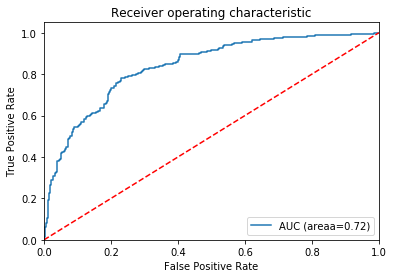

In [42]:
logit_roc_auc=roc_auc_score(y,log_model.predict(X))
fpr,tpr,thresholds=roc_curve(y,log_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="AUC (areaa=%0.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

MODEL TUNİNG/DOĞRULAMA/VALİDATİON

In [43]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.30,random_state=42)

In [44]:
log_model=LogisticRegression(solver="liblinear").fit(X_train,y_train)

In [46]:
y_pred=log_model.predict(X_test)

In [47]:
print(accuracy_score(y_test,y_pred))

0.7532467532467533


In [49]:
cross_val_score(log_model,X_test,y_test) #hata hesaplama işlemi yaptı(5 katlı doğrulama yaptı varsayılanı o)

array([0.78723404, 0.82608696, 0.82608696, 0.69565217, 0.73913043])

In [51]:
cross_val_score(log_model,X_test,y_test, cv=10).mean()

0.7704710144927536